#### 회귀
- 소득이 증가하면 소비도 증가, 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형 관계가 있다고 할 수 있음.
- 두 변수 사이에 일 대 일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 Simple Linear Regression이라고 함.
- 변수 X,Y에 대한 정보를 가지고 일차 방정식의 계수 a,b를 찾는 과정이 단순회귀분석 알고리즘

## 회귀 평가 지표
- MAE : 실제 값과 예측값의 차이를 절대값으로 변환해 평균을 계산한 것
- MSE : 실제 값과 예측값의 차이를 제곱해 평균을 계산한 것
- RMSE : MSE에 루트를 씌운것(실제 오류 평균보다 커지는 것을 보정)
- R square : 분산 기반으로 예측 성능을 평가, 실제값의 분산 대비 예측값의 분산 비율을 지표로 함
  - 1에 가까울수록 예측 정확도가 높음. 예측값 Variance/ 실제값 Variance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install openpyxl

In [ ]:
ndf = pd.read_excel("./dataset/auto-mpg.xlsx")
ndf.head()

In [ ]:
ndf.info()

In [ ]:
ndf.horsepower[ndf['horsepower'] == '?']= np.nan
ndf.horsepower = ndf.horsepower.astype('float')
ndf.dropna(subset = ['horsepower'],axis = 0,inplace = True)
ndf.horsepower.unique()

In [ ]:
X = ndf[['weight']]
y = ndf['mpg']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 11)


In [ ]:
sns.set_style('darkgrid')
sns.regplot(x = 'weight',y = 'mpg',data = ndf)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

In [ ]:
print(lr.coef_)
print(lr.intercept_)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r_square = r2_score(y_test,y_preds)
print(mse,rmse,r_square)

In [ ]:
y_hat = lr.predict(X)
sns.distplot(y_hat,kde=True)

## 다항 회귀분석
- 직석보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선형태의 회귀선을 표현할 수 있음
- 2차 함수 이상의 다항 함수를 이용하여 두 변수간의 선형관계를 설명하는 알고리즘
- 다항회귀도 선형회귀임. 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관

In [ ]:
X_train.shape

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
print(X_train.shape, X_train_poly.shape)

In [ ]:
X_train_poly[:5]

In [ ]:
poly.get_feature_names()

In [ ]:
pr = LinearRegression()
pr.fit(X_train_poly,y_train)

X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly, y_test)
r_square

In [ ]:
print(pr.coef_)
print(pr.intercept_)

In [ ]:
y_hat_test = pr.predict(X_test_poly)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label = 'Train Data')
ax.plot(X_test,y_hat_test,'r+',label = 'Predicted Value')
ax.legend(loc='best')
plt.show()

In [ ]:
# X 데이터를 X_poly 데이터셋으로 2차함수로 만들어진 데이터셋을 예측하고 시각화하세요
import numpy as np
np.random.seed(42)
m = 100
X = 6* np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
print(X_train.shape, X_train_poly.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
pr = LinearRegression()
pr.fit(X_train_poly,y_train)

X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly, y_test)
r_square

In [ ]:
y_hat_test = pr.predict(X_test_poly)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label = 'Train Data')
ax.plot(X_test,y_hat_test,'r+',label = 'Predicted Value')
ax.legend(loc='best')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 11)
# 2차 다항식으로 바꿈
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
# 훈련 및 학습
lr = LinearRegression()
lr.fit(X_train_poly,y_train)
y_preds = lr.predict(X_test_poly)
# 시각화
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_preds,'r+', label='Predicted Value')
ax.legend(loc='best')
plt.show()
plt.close()

## 다중 회귀 분석
- 여러 개의 독립변수가 종속변수에 영향을 주고 선형 관계를 갖는 경우에 다중회귀분석을 사용
- 다중회귀분석 알고리즘은 각 독립변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성

In [ ]:
ndf = pd.read_excel("./dataset/auto-mpg.xlsx")
ndf.horsepower[ndf['horsepower'] == '?']= np.nan
ndf.horsepower = ndf.horsepower.astype('float')
ndf.dropna(subset = ['horsepower'],axis = 0,inplace = True)
ndf.head()

In [ ]:
df = ndf[['mpg','cylinders','horsepower','weight']]
df.head()

In [ ]:
X = df.drop('mpg',axis = 1)
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 10)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
r_square = lr.score(X_test,y_test)
round(r_square,4)

In [ ]:
#mse,rmse,r_square 기울기, 절편
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r_square = r2_score(y_test,y_preds)
print(mse,rmse,r_square)
print(lr.coef_)
print(lr.intercept_)

In [ ]:
# y_test, y_hat을 하나의 그래프로 비교하여 시각화
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
print(X_train_poly.shape)
X_test_poly = poly.fit_transform(X_test)
print(X_test_poly.shape)

lr = LinearRegression()
lr.fit(X_train_poly,y_train)
y_preds = lr.predict(X_test_poly)


fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_preds,'r+', label='Predicted Value')
ax.legend(loc='best')
plt.show()
plt.close()


In [ ]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_preds,'r+', label='Predicted Value')
ax.set_xlim(0,250)
ax.legend(loc='best')
plt.show()
plt.close()


In [4]:
# 아래 Boston 데이터 셋으로 보스턴 주택 가격 예측 모델을 만들고 평가하세요.
from sklearn.datasets import load_boston

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


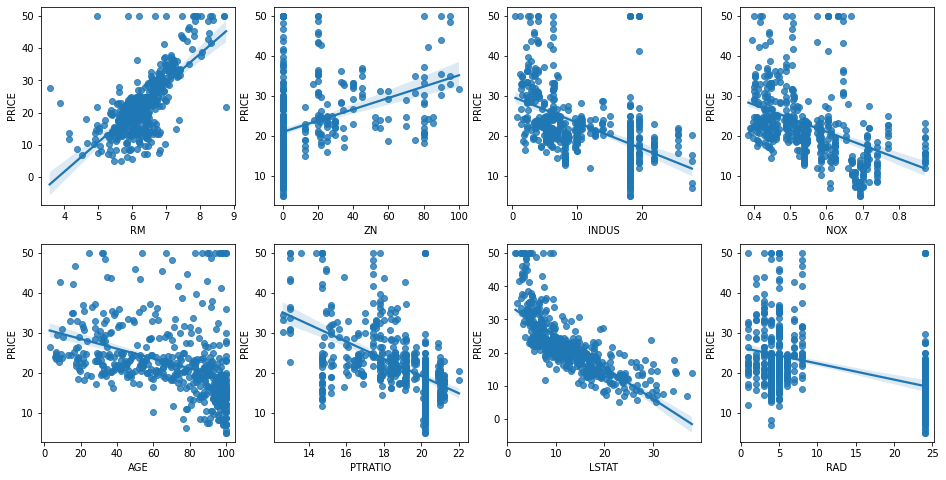

In [5]:
fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows = 2)

lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i ,feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature,y='PRICE',data=boston_df, ax = axs[row][col])

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y = boston_df['PRICE']
X = boston_df.drop(['PRICE'],axis = 1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 156)

lr = LinearRegression()
lr.fit(X_train,y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print(mse, rmse)
print(r2_score(y_test,y_preds))

17.29691590790197 4.158956107955693
0.7572263323138948


<AxesSubplot:>

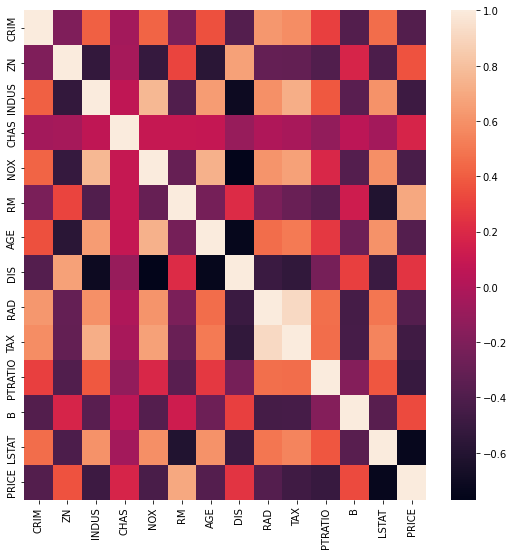

In [7]:
import seaborn as sns

hc = boston_df.corr()
plt.figure(figsize = (9,9))
sns.heatmap(hc)

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

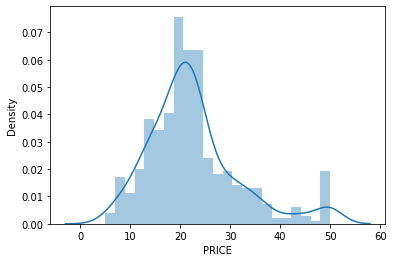

In [8]:
sns.distplot(boston_df.PRICE)

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

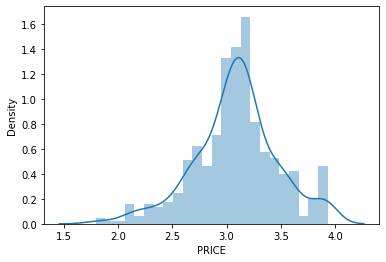

In [9]:
import numpy as np
y_log = np.log1p(boston_df['PRICE'])
sns.distplot(y_log)

In [11]:
# 변수 선택 및 로그 변환 후 모델링 및 평가

X = boston_df[['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']]
y = boston_df['PRICE']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print(mse, rmse)
print(r2_score(y_test,y_preds))

print(lr.coef_)
print(lr.intercept_)

25.933977232124217 5.092541333374155
0.7170462892523813
[ 3.17096982e+00 -4.17033471e-03  7.43418208e-02 -1.47089783e+01
  3.39523813e-02 -1.18898012e+00 -6.42425285e-01  9.38068041e-02]
36.903255476845075


#### 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
- 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 필요가 있음
- 선형 모형의 비용함수는 RSS(실제 값과 예측값의 차이)를 최소화하는 것만 고려한 결과 테스트 데이터 세트 예측 성능 저하 초래
- RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이루게 해야 함(최적모델을 위한 Cost 함수 구성요소 = 학습데이터 잔차 오류 최소화 + 회귀계수 크기 제어)
- 회귀 계수 값의 크기를 조절하기 위하여 비용 함수에 알파 값으로 패널티를 부여해 과적합을 개선하는 방식을 규제라고 함
- alpha값을 크게 하면 비용 함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있으며 alpha값을 작게 하면 회귀 계수 W의 값이 커져도 어느정도 상쇄가 가능하므로 학습데이터 적합을 더 개선
- 비용함수에 alpha값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제라고 한다.
- 규제는 크게 L2 방식과 L1 방식으로 구분되며 전자를 적용한 회귀를 릿지, 후자를 적용한 것이 라쏘임
- L2는 W의 제곱에 패널티를 부여하며 L1은 W의 절댓값에 패널티 부여
- 엘리스틱넷 회귀는 L2 규제와 L1 규제를 결합한 회귀


In [14]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha = 10)
neg_mse_score = cross_val_score(ridge, X,y,scoring = "neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1*neg_mse_score)
avg_rmse = np.mean(rmse_scores)

print(np.round(rmse_scores,3))
print(avg_rmse)

[3.216 5.405 6.227 9.091 5.8  ]
5.947597737623141


In [15]:
alphas = [0 , 0.1 , 1 , 10 , 100]

for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    neg_mse_scores = cross_val_score(ridge, X, y, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.round(np.sqrt(-1 * neg_mse_scores), 2)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print(f'alpha: {alpha}\nRMSE: {rmse_scores}\n평균 RMSE: {avg_rmse:.3f}\n')


alpha: 0
RMSE: [3.4  5.23 6.23 9.47 5.94]
평균 RMSE: 6.051

alpha: 0.1
RMSE: [3.38 5.23 6.22 9.46 5.93]
평균 RMSE: 6.044

alpha: 1
RMSE: [3.28 5.27 6.18 9.42 5.92]
평균 RMSE: 6.013

alpha: 10
RMSE: [3.22 5.4  6.23 9.09 5.8 ]
평균 RMSE: 5.948

alpha: 100
RMSE: [3.52 5.75 6.75 7.8  5.24]
평균 RMSE: 5.811



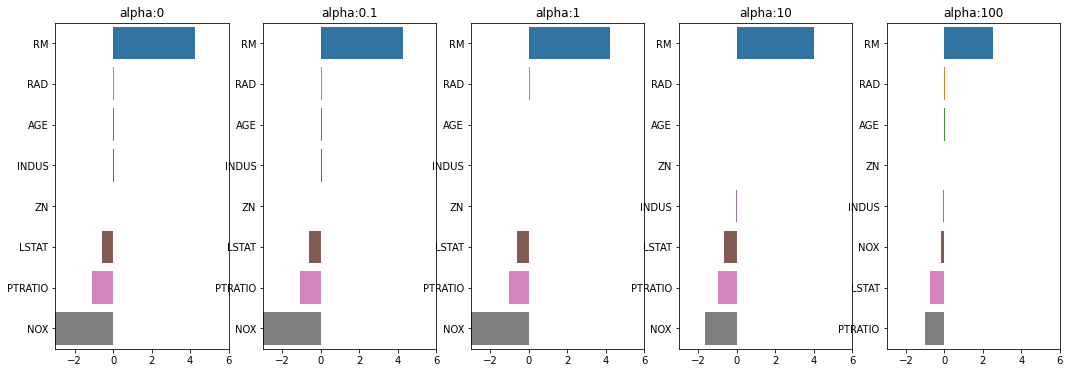

In [25]:
# 회귀계수 감소를 시각화
fig, axs = plt.subplots(figsize = (18,6),nrows=1,ncols=5)

coeff_df = pd.DataFrame()

for i , alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X,y)
    coeff = pd.Series(data=ridge.coef_,index=X.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[i].set_title(colname)
    axs[i].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index,ax=axs[i])
    
plt.show()

In [54]:
# 모델이름과 alpha 리스트를 대입하면 각 alpha값별로 rmse를 구해주는 사용자 함수를 작성하여 아래를 수행하세요.

from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name,params=None, X_n=None, y_n=None, verbose = True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose:
        print('#####',model_name,'######')
    for param in params:
        if model_name == 'Ridge':
            model = Ridge(alpha = param)
        elif model_name == 'Lasso':
            model = Lasso(alpha = param)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha = param)
            
        neg_mse_scores = cross_val_score(model, X_n, y_n, scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('param: ',param,'평균 rmse: ',avg_rmse)
        
        model.fit(X_n,y_n)
        if return_coeff:
            coeff = pd.Series(data=model.coef_,index=X_n.columns)
            colname = 'alpha:'+str(param)
            coeff_df[colname] = coeff
    return coeff_df

In [55]:
lasso_alphas = [0.07,0.1,0.5,1.3]
coeff_lasso_df= get_linear_reg_eval('Lasso',params=lasso_alphas, X_n=X, y_n=y)

##### Lasso ######
param:  0.07 평균 rmse:  5.612284267526676
param:  0.1 평균 rmse:  5.615116035266936
param:  0.5 평균 rmse:  5.6691234095948975
param:  1.3 평균 rmse:  5.845140126349935


In [56]:
coeff_lasso_df

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1.3
CRIM,-0.098193,-0.097894,-0.083289,-0.051638
ZN,0.049059,0.049211,0.049544,0.048850
INDUS,-0.042120,-0.036619,-0.005253,-0.000000
CHAS,1.434343,0.955190,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000
RM,3.789725,3.703202,2.498212,0.018113
AGE,-0.011706,-0.010037,0.003604,0.031350
DIS,-1.176583,-1.160538,-0.936605,-0.511309
RAD,0.270936,0.274707,0.277451,0.255433
TAX,-0.014290,-0.014570,-0.015442,-0.014981


In [57]:
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column,ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1.3
RM,3.789725,3.703202,2.498212,0.018113
CHAS,1.434343,0.955190,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.255433
ZN,0.049059,0.049211,0.049544,0.048850
B,0.010248,0.010249,0.009469,0.007507
NOX,-0.000000,-0.000000,-0.000000,-0.000000
AGE,-0.011706,-0.010037,0.003604,0.031350
TAX,-0.014290,-0.014570,-0.015442,-0.014981
INDUS,-0.042120,-0.036619,-0.005253,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.051638


In [58]:
elastic_alphas = [0.07,0.1,0.5,1.3]
coeff_elastic_df= get_linear_reg_eval('ElasticNet',params=elastic_alphas, X_n=X, y_n=y)

##### ElasticNet ######
param:  0.07 평균 rmse:  5.5032089893304565
param:  0.1 평균 rmse:  5.4783894085720934
param:  0.5 평균 rmse:  5.412658488690828
param:  1.3 평균 rmse:  5.597223485069061


In [59]:
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column,ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1.3
RM,3.445833,3.252662,1.723610,0.665822
CHAS,1.287475,0.987970,0.000000,0.000000
RAD,0.284007,0.288726,0.311583,0.290613
ZN,0.050678,0.051377,0.054045,0.052434
B,0.010035,0.009963,0.008997,0.008088
AGE,-0.008997,-0.007219,0.009475,0.025055
TAX,-0.014636,-0.014952,-0.016300,-0.016356
INDUS,-0.045733,-0.045901,-0.031702,-0.001008
CRIM,-0.100331,-0.100079,-0.092503,-0.073460
NOX,-0.484864,-0.059533,-0.000000,-0.000000
